# 1. Eksplorasi Dataset

In [5]:
import re
import string
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [6]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
df = pd.read_csv('dataset_MOBA_clean2.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,clean_content
0,da18edfa-431b-494d-8f2f-cd92414635a3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,seru si game nya ringan kalo dibandingin sama ...,4,1,1.59.2.5,2025-08-25 21:56:17,NaN,NaN,1.59.2.5,seru si game nya ringan dibandingin moba gold ...
1,d09619c4-6e7e-4d57-b41d-418cfbe887be,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kenapa selalu setiap update file file yang sud...,5,596,1.59.2.5,2025-07-10 12:40:50,NaN,NaN,1.59.2.5,update file file unduh unduh ulang kali update...
2,ef1494b8-7b81-4d5f-a627-decc9578c101,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya sebagai pemain dirugikan pada update kali...,5,373,1.59.1.1,2025-06-22 20:51:44,NaN,NaN,1.59.1.1,main rugi update kali bot main tim bot gerak t...
3,8fd28a39-8b3f-4640-b6a4-b86e64f9f823,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"game nya udah seru banget, tapi tolong untuk f...",5,163,1.58.2.4,2025-06-28 19:35:30,NaN,NaN,1.58.2.4,game nya udah seru banget tolong full data siz...
4,68aef109-aec0-424d-816f-7d1e95f926ac,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ada 4 masalah yang saya harapkan diperbaiki : ...,1,817,1.58.2.4,2025-06-14 10:01:48,NaN,NaN,1.58.2.4,harap baik matching player siang malam matchin...


In [58]:
df.shape

(400000, 12)

In [5]:
dtypes_df = pd.DataFrame(df.dtypes, columns=['dtype'])
desc = df.describe(include='all').T
summary = dtypes_df.join(desc)
summary

,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
reviewId,object,400000,400000,da18edfa-431b-494d-8f2f-cd92414635a3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userName,object,400000,14943,Pengguna Google,384889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userImage,object,400000,15101,https://play-lh.googleusercontent.com/EGemoI2N...,384889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
content,object,400000,377697,Game nya bagus,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,int64,400000.0,NaN,NaN,NaN,3.201427,1.793995,1.0,1.0,4.0,5.0,5.0
thumbsUpCount,int64,400000.0,NaN,NaN,NaN,11.741077,266.374535,0.0,0.0,0.0,0.0,44027.0
reviewCreatedVersion,object,258622,440,1.9.93.10904,28701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
at,object,400000,396633,2024-06-21 17:26:04,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
replyContent,object,44543,17477,Hubungi kami dengan menuliskan tiket di https:...,2141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
repliedAt,object,44543,44127,2020-11-07 15:36:15,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.isnull().sum()

reviewId                     0
userName                     0
userImage                    0
content                      0
score                        0
thumbsUpCount                0
reviewCreatedVersion    141378
at                           0
replyContent            355457
repliedAt               355457
appVersion              141378
clean_content             1018
dtype: int64

In [15]:
df_clean = df[['clean_content', 'score']]
df_clean.dropna(inplace=True)
df_clean.isnull().sum()

clean_content    0
score            0
dtype: int64

In [16]:
df_clean.drop_duplicates(inplace=True)
df_clean.duplicated().sum()

0

In [17]:
df_clean.shape

(360700, 2)

# 2. Preprocessing Data

## Handle Imbalance Data

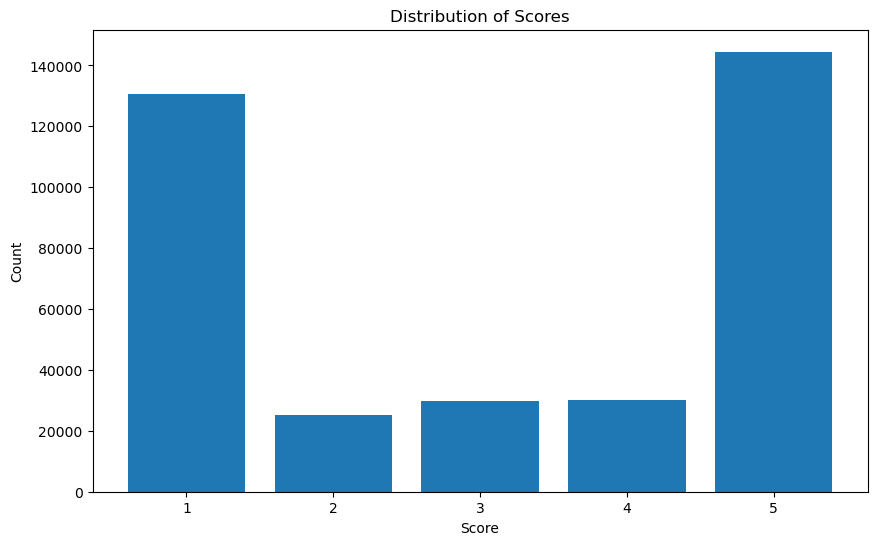

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(df_clean["score"].value_counts().index, df_clean["score"].value_counts().values)
plt.title("Distribution of Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

### Undersampling

In [11]:
df_class_1 = df_clean[df_clean['score'] == 1]
df_class_2 = df_clean[df_clean['score'] == 2]
df_class_3 = df_clean[df_clean['score'] == 3]
df_class_4 = df_clean[df_clean['score'] == 4]
df_class_5 = df_clean[df_clean['score'] == 5]

df_clean['score'].value_counts()

score
5    145370
1    131946
4     30326
3     29921
2     25364
Name: count, dtype: int64

In [12]:
df_class_1_under = df_class_1.sample(df_class_2.shape[0])
df_class_3_under = df_class_3.sample(df_class_2.shape[0])
df_class_4_under = df_class_4.sample(df_class_2.shape[0])
df_class_5_under = df_class_5.sample(df_class_2.shape[0])

df_test_under = pd.concat([df_class_1_under, df_class_2, df_class_3_under, df_class_4_under, df_class_5_under], axis=0)

print('Random under-sampling:')
print(df_test_under['score'].value_counts())

Random under-sampling:
score
1    25364
2    25364
3    25364
4    25364
5    25364
Name: count, dtype: int64


In [82]:
df_test_under.shape[0]

126820

## Preprocess Text

In [78]:
stop_words = set(stopwords.words('indonesian'))
negasi_words = {"tidak", "bukan", "nggak", "enggak", "tak", "ga", "gak", "tidak"}
stop_words = stop_words.difference(negasi_words)

stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [79]:
indo_dict = {
    "anjir": "anjing", "anjay": "anjing", "asu": "anjing",
    "ga": "tidak", "gk": "tidak", "gak": "tidak",
    "bgt": "banget", "wkwk": "tertawa",
    "gw": "saya", "gue": "saya", "loe": "kamu", "lu": "kamu",
    "yg": "yang", "gmn": "bagaimana", "blm": "belum", "dgn" : "dengan",
    "saja": "saja", "aja": "saja", "klo": "kalau", "kalo": "kalau",
    "tp": "tapi", "tdk": "tidak", "td": "tidak", "trs": "terus", "trus": "terus"
}

In [80]:
def normalize_with_tokenizer(text, dictionary):
    tokens = word_tokenize(text.lower())
    normalized_tokens = [dictionary.get(tok, tok) for tok in tokens]
    return " ".join(normalized_tokens)

In [83]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticon
                           u"\U0001F300-\U0001F5FF"  # simbol & pictograph
                           u"\U0001F680-\U0001F6FF"  # transport & map
                           u"\U0001F1E0-\U0001F1FF"  # bendera
                           u"\U00002700-\U000027BF"  # dingbat
                           u"\U0001F900-\U0001F9FF"  # emoji tambahan
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [84]:
def preprocess_sentiment(text, apply_stemming=True):
    if pd.isnull(text):
        return ""

    # 1. Case folding (lowercase)
    text = text.lower()

    # 2. Cleaning
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)   # URL
    text = re.sub(r'@\w+', '', text)                      # mention
    text = re.sub(r'#', '', text)                         # hapus simbol #
    text = re.sub(r'\d+', '', text)                       # angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # tanda baca
    text = re.sub(r'[^\w\s]', '', text)                   # karakter non-alfabet
    text = re.sub(r'\s+', ' ', text).strip()              # spasi berlebih
    text = remove_emoji(text)                             # 🚀 hapus emoji

    # 3. Normalisasi slang
    text = normalize_with_tokenizer(text, indo_dict)

    # 4. Tokenizing
    tokens = word_tokenize(text)

    # 5. Remove stopwords
    tokens = [w for w in tokens if w not in stop_words]

    # 6. Stemming (opsional)
    if apply_stemming:
        tokens = [stemmer.stem(w) for w in tokens]

    return " ".join(tokens)

In [85]:
df["clean_content"] = df["content"].apply(preprocess_sentiment)

In [38]:
df.shape

(400000, 12)

In [86]:
df[["content", "clean_content"]]


,content,clean_content
0,seru si game nya ringan kalo dibandingin sama ...,seru si game nya ringan dibandingin moba gold ...
1,kenapa selalu setiap update file file yang sud...,update file file unduh unduh ulang kali update...
2,Saya sebagai pemain dirugikan pada update kali...,main rugi update kali bot main tim bot gerak t...
3,"game nya udah seru banget, tapi tolong untuk f...",game nya udah seru banget tolong full data siz...
4,Ada 4 masalah yang saya harapkan diperbaiki : ...,harap baik matching player siang malam matchin...
...,...,...
399995,Gabut doang,gabut doang
399996,Game asu,game anjing
399997,game burik,game burik
399998,Gk seru,tidak seru


In [87]:
df.to_csv('dataset_MOBA_clean2.csv', index=False)

# 3. Split Data

In [18]:
X = df_test_under["clean_content"]
y = df_test_under["score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
X_train.shape,X_test.shape

((101456,), (25364,))

## Normalization Dataset

In [85]:
preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(max_features=20000, ngram_range=(1,2)), "clean_content")
    ]
)

## Select Model

In [86]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "SGD": SGDClassifier(),
    "XGBoost": XGBClassifier(eval_metric="mlogloss", use_label_encoder=False)
}

## Training Model

In [87]:
from sklearn.preprocessing import LabelEncoder

results = {}

# Label encoder untuk XGBClassifier
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

for name, clf in models.items():
    print("="*50)
    print(f" Training {name} ".center(50, "="))

    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])

    # Kalau model XGB → pakai encoded labels
    if name.lower() == "xgboost":
        pipe.fit(X_train, y_train_enc)
        y_pred = pipe.predict(X_test)
        # decode balik ke label asli (1–5)
        y_pred_final = le.inverse_transform(y_pred)
        acc = accuracy_score(y_test, y_pred_final)
        print(f"\nAccuracy {name}: {acc:.4f}\n")
        print(classification_report(y_test, y_pred_final))

    else:
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"\nAccuracy {name}: {acc:.4f}\n")
        print(classification_report(y_test, y_pred))

    results[name] = acc

========== Training Logistic Regression ==========

Accuracy Logistic Regression: 0.3958

              precision    recall  f1-score   support

           1       0.45      0.50      0.47      5073
           2       0.31      0.31      0.31      5072
           3       0.28      0.24      0.26      5073
           4       0.36      0.32      0.34      5073
           5       0.53      0.61      0.57      5073

    accuracy                           0.40     25364
   macro avg       0.39      0.40      0.39     25364
weighted avg       0.39      0.40      0.39     25364

================== Training SVM ==================

Accuracy SVM: 0.3705

              precision    recall  f1-score   support

           1       0.42      0.47      0.44      5073
           2       0.30      0.29      0.29      5072
           3       0.26      0.23      0.24      5073
           4       0.33      0.28      0.30      5073
           5       0.50      0.58      0.54      5073

    accuracy         

## LSTM

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
import joblib

tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_test_under["clean_content"])
joblib.dump(tokenizer, "models/tokenizers.pkl")  # ✅ simpan objek Tokenizer


['models/tokenizers.pkl']

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

# embedding_layer = Embedding(
#     input_dim=vocab_size,
#     output_dim=embedding_dim,
#     weights=[embedding_matrix],  # pakai Word2Vec CBOW
#     input_length=100,
#     trainable=False               # False = freeze Word2Vec, True = fine-tune
# )

# Tokenisasi
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_test_under["clean_content"])
X = tokenizer.texts_to_sequences(df_test_under["clean_content"])
X = pad_sequences(X, maxlen=100)

y = df_test_under["score"] - 1   # shift rating jadi 0-4

# Bangun model LSTM
model = Sequential([
    Embedding(input_dim=20000, output_dim=256, input_length=100),
    LSTM(192, return_sequences=False),
    Dropout(0.2),
    Dense(96, activation="relu"),
    Dense(5, activation="softmax")  # output 5 kelas rating
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

# Train
model.fit(X, y, validation_split=0.2, epochs=20, batch_size=128)
model.save("rating_predict_best.h5")


In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam, RMSprop
import keras_tuner as kt

# ============================
# 1. Tokenizer & Padding
# ============================
MAX_WORDS = 20000
MAX_LEN = 100

# tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
# tokenizer.fit_on_texts(df["clean_content"])
# X = tokenizer.texts_to_sequences(df["clean_content"])
# X = pad_sequences(X, maxlen=MAX_LEN)

# y = df["score"] - 1   # ubah jadi 0–4

# ============================
# 2. Definisikan Model Builder
# ============================
def build_model(hp):
    model = Sequential()
    # Embedding
    model.add(Embedding(
        input_dim=MAX_WORDS,
        output_dim=hp.Choice("embedding_dim", [64, 128, 256]),
        input_length=MAX_LEN
    ))
    # LSTM
    model.add(LSTM(
        units=hp.Int("lstm_units", min_value=64, max_value=256, step=64),
        return_sequences=False
    ))
    # Dropout
    model.add(Dropout(hp.Float("dropout", 0.2, 0.5, step=0.1)))
    # Dense hidden layer
    model.add(Dense(hp.Int("dense_units", 32, 128, step=32), activation="relu"))
    # Output layer
    model.add(Dense(5, activation="softmax"))

    # Optimizer
    optimizer = hp.Choice("optimizer", ["adam", "rmsprop"])
    if optimizer == "adam":
        opt = Adam(learning_rate=hp.Choice("lr", [1e-3, 5e-4, 1e-4]))
    else:
        opt = RMSprop(learning_rate=hp.Choice("lr", [1e-3, 5e-4, 1e-4]))

    model.compile(
        optimizer=opt,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# ============================
# 3. Keras Tuner
# ============================
tuner = kt.Hyperband(
    build_model,
    objective="accuracy",
    max_epochs=10,
    factor=3,
    directory="tuner_results",
    project_name="lstm_rating"
)

# Early stopping
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Jalankan search
tuner.search(X, y, epochs=15, validation_split=0.2, batch_size=128, callbacks=[stop_early])

# ============================
# 4. Dapatkan Model Terbaik
# ============================
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best hyperparameters:
Embedding dim: {best_hps.get('embedding_dim')}
LSTM units: {best_hps.get('lstm_units')}
Dropout: {best_hps.get('dropout')}
Dense units: {best_hps.get('dense_units')}
Optimizer: {best_hps.get('optimizer')}
Learning rate: {best_hps.get('lr')}
""")

# ============================
# 5. Train Ulang Model Terbaik
# ============================
model = tuner.hypermodel.build(best_hps)
history = model.fit(X, y, validation_split=0.2, epochs=20, batch_size=128, callbacks=[stop_early])

# Simpan model & tokenizer
model.save("best_lstm_model.h5")
import joblib
joblib.dump(tokenizer, "tokenizer.pkl")


Trial 30 Complete [00h 08m 59s]
accuracy: 0.4415978491306305

Best accuracy So Far: 0.6863330602645874
Total elapsed time: 07h 35m 18s

Best hyperparameters:
Embedding dim: 256
LSTM units: 192
Dropout: 0.2
Dense units: 96
Optimizer: adam
Learning rate: 0.001

Epoch 1/20
799/799 ━━━━━━━━━━━━━━━━━━━━ 372s 462ms/step - accuracy: 0.3674 - loss: 1.3074 - val_accuracy: 0.0000e+00 - val_loss: 8.9271
Epoch 2/20
799/799 ━━━━━━━━━━━━━━━━━━━━ 356s 446ms/step - accuracy: 0.4638 - loss: 1.1717 - val_accuracy: 0.0000e+00 - val_loss: 11.3894
Epoch 3/20
799/799 ━━━━━━━━━━━━━━━━━━━━ 355s 444ms/step - accuracy: 0.5067 - loss: 1.1067 - val_accuracy: 0.0000e+00 - val_loss: 11.5396
Epoch 4/20
799/799 ━━━━━━━━━━━━━━━━━━━━ 341s 427ms/step - accuracy: 0.5517 - loss: 1.0241 - val_accuracy: 0.0000e+00 - val_loss: 13.0917


['tokenizer.pkl']